In [37]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import cv2
from scipy.stats import multivariate_normal

In [38]:
def media(I):
    ch = I.shape[2]
    med=np.zeros(ch,)
    for i in range(ch):
        med[i]=np.mean(I[:,:,i].ravel())
    return med

In [39]:
def mcov(I):
    nx,ny,ch = I.shape
    It=np.zeros((ch,nx*ny))
    for i in range(ch):
        It[i,:]=I[:,:,i].ravel()
    cova=np.cov(It)
    return cova

In [40]:
def mcovi(I,sx,sy):
    I=I.astype(np.float)
    nx,ny,ch = I.shape
    It=np.zeros((ch,len(sx)))
    for i in range(ch):
        It[i,:]=I[sx,sy,i].ravel()
    cova=np.cov(It)
    return cova

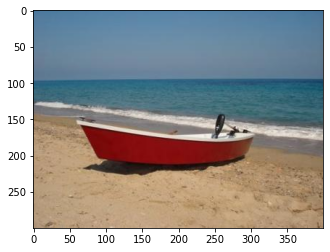

In [41]:
I = cv2.imread('im25.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I,cmap='gray')
nx,ny,ch = I.shape

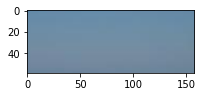

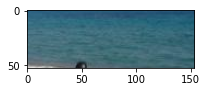

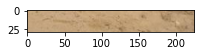

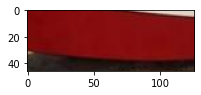

In [42]:
nm=4
phi=np.ones([nm,])/nm
med=np.zeros((nm,ch))
mc=np.zeros((nm,ch,ch))
for i in range(nm):
    roi=cv2.selectROI('sel',I)
    cv2.destroyWindow('sel')
    Iroi=I[int(roi[1]):int(roi[1]+roi[3]),int(roi[0]):int(roi[0]+roi[2]),:]
    fig=plt.figure(figsize = (3,3))
    plt.imshow(Iroi)
    med[i,:]=media(Iroi)
    mc[i,:,:]=mcov(Iroi)
medr=med 
mcovr=mcov


[[110.56908389 138.83179575 162.59558035]
 [ 60.71526587 106.2277628  121.6432247 ]
 [190.22268199 158.55049808 119.97639847]
 [113.73257419  21.9884403   21.90251898]]
___________
[[102.07276976 134.40734214 160.35101625]
 [ 83.31981679 118.24063823 135.82504141]
 [179.64093399 149.37471242 115.2049972 ]
 [135.2662984   91.34543633  85.34812786]]
___________


C:\Users\coyul\AppData\Local\Temp/ipykernel_7020/3257234808.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  I=I.astype(np.float)


[[ 99.25534192 132.78810877 159.54658833]
 [ 82.61453444 117.60281869 133.69551901]
 [179.15488387 148.98024155 114.98600872]
 [135.04318379  91.25708525  85.2966386 ]]
___________
[[ 98.08761283 131.89621907 158.86713673]
 [ 81.76667276 116.64826922 130.9200301 ]
 [179.063365   148.90244683 114.94584712]
 [135.0560151   91.12820858  85.19419747]]
___________
[[ 97.89263255 131.5393407  158.40499952]
 [ 82.20351833 116.48115286 129.41386173]
 [179.04111832 148.88327673 114.93590549]
 [134.78491905  89.69276019  83.7180361 ]]
___________
[[ 97.82808872 131.40896576 158.22341868]
 [ 83.83202641 116.97794992 129.07425622]
 [179.02019469 148.86567033 114.92719503]
 [134.43434917  87.69846749  81.65562583]]
___________
[[ 97.79228675 131.36239922 158.16323665]
 [ 85.79692931 117.65163551 129.12929198]
 [179.00684291 148.85451528 114.92171932]
 [134.01339735  85.38415157  79.24535739]]
___________
[[ 97.77624284 131.34497735 158.14161734]
 [ 87.89256044 118.34190384 129.24963854]
 [179.01568

<function matplotlib.pyplot.show(close=None, block=None)>

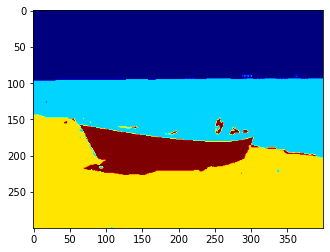

In [43]:
med=medr  
mcov=mcovr
print(med)
print("___________")

lon=nx*ny
pdf=np.zeros((nm,lon))             
It=np.zeros((lon,ch))
for i in range(ch):
    It[:,i]=I[:,:,i].ravel()
It=It.astype(float)
pdf=np.zeros((lon,nm))

for ite in range(15):
    for model in range(nm):
        pdf[:,model]=phi[model]*multivariate_normal.pdf(It[:,:], mean=med[model,:] , cov=mc[model,:,:]) 
    pdf=np.nan_to_num(pdf)
    pdft=np.sum(pdf,axis=1)
    gamma=pdf.T/pdft
    gamma=np.nan_to_num(gamma)
    
    for model in range(nm):
        temp=np.reshape(gamma[model,:],(nx,ny))
        gamma[model,:]=cv2.blur(temp,(30, 30)).ravel()
        #gamma[model,:]=cv2.GaussianBlur(temp,(15,15),cv2.BORDER_DEFAULT).ravel()
    assign=np.argmax(gamma,axis=0)
    for model in range(nm):
        suma=np.sum(gamma[model,:])
        phi[model]=suma/lon
        classt=np.where(assign==model)
        classt=classt[0]
        sx,sy=np.unravel_index(classt, (nx,ny))
        for i in range(ch):
            med[model,i]=np.dot(gamma[model,:],It[:,i])/suma
        mc[model,:,:]=mcovi(I,sx,sy)
    print(med)
    print("___________")
for model in range(nm):
    pdf[:,model]=phi[model]*multivariate_normal.pdf(It[:,:], mean=med[model,:] , cov=mc[model,:,:]) 
pdf=np.nan_to_num(pdf)
pdft=np.sum(pdf,axis=1)
gamma=pdf.T/pdft
gamma=np.nan_to_num(gamma)
for j in range(nm):
    temp=np.reshape(gamma[model,:],(nx,ny))
    gamma[model,:]=cv2.blur(temp,(3,3)).ravel()
assign=np.argmax(gamma,axis=0)
assign=np.reshape(assign,(nx,ny))
plt.imshow(assign,cmap='jet')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

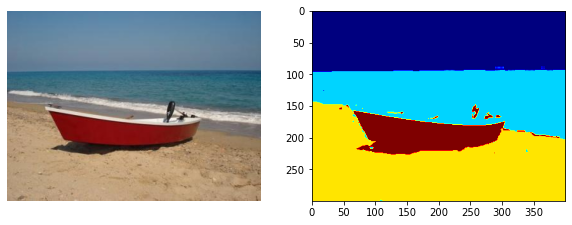

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(I, cmap='gray',vmin=0,vmax=255)
ax[0].axis('off')

Irt=np.argmax(gamma,axis=0)
Irt=np.reshape(Irt, (nx, ny))   
ax[1].imshow(Irt,cmap='jet')
plt.show